# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier


## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [3]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= dataset.TARGET, random_state=42)

In [4]:
print(f"datapoints for training: {len(X_train)}")
print(f"datapoints for testing: {len(X_test)}")

datapoints for training: 1483
datapoints for testing: 371



Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1. Se quiere construir un predictor que tome decisiones para aprobrar creditos hipotercarios de vivienda. Conocidos como HELOC los cuales se caracterizan a menudo por tener una tasa de interés más baja que otros tipos comunes de préstamos, y su interés puede ser deducible de impuestos. Cada registro consiste en diversos datos del credito otorgado a través del proceso actual de concesión de préstamos.   


2. La variable objetivo que se quiere predecir es Target, la cual es una variable binaria indica si el solicitante finalmente incumplió con el credito hipotecario (1) o pago el credito (0). El incumplimiento del pago se encuentra en 1189 casos.  



3. Los atributos del dataset son los siguientes

LOAN: Monto solicitado del préstamo.

MORTDUE: Monto adeudado de la hipoteca existente.

VALUE: Valor de la propiedad actual.

YOJ: Años en el trabajo actual.

DEROG: Número de informes despectivos importantes, la cual indica una morosidad grave o retrasos en los pagos.

DELINQ: Número de líneas de crédito morosas. Una línea de crédito se vuelve morosa cuando un prestatario no realiza los pagos mínimos requeridos entre 30 y 60 días después del día en que vencían los pagos.

CLAGE: Edad de la línea crédito más antigua en meses.

NINQ: Número de líneas de crédito recientes.

CLNO: Número de líneas de crédito existentes.

DEBTINC: Relación deuda-ingresos. (todos los pagos mensuales de su deuda divididos por su ingreso bruto mensual). Este número es una forma en que los prestamistas miden su capacidad para administrar los pagos mensuales para pagar el dinero que planea pedir prestado


4. Creemos que los atributos que nos ayudaran a predecir si se incumplio o no con el pago del credito son el monto del prestamo (`Loan`), la relacion deuda-ingresos `DEBTINC`y el número de lineas de crédito mosoras `DELINQ`



## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [5]:
model = SGDClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

classes = model.classes_
print(classes)


[0 1]


In [6]:
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             ConfusionMatrixDisplay,
                             accuracy_score,
                             f1_score,
                             recall_score,
                             precision_score
                             )

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Parametros por defecto

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

print("Accuracy:", accuracy)

Accuracy: 0.8706199460916442
F1 Score: 0.4285714285714286
Recall: 0.2903225806451613
Precision: 0.8181818181818182
Accuracy: 0.8706199460916442


              precision    recall  f1-score   support

           1       0.82      0.29      0.43        62
           0       0.87      0.99      0.93       309

    accuracy                           0.87       371
   macro avg       0.85      0.64      0.68       371
weighted avg       0.86      0.87      0.84       371



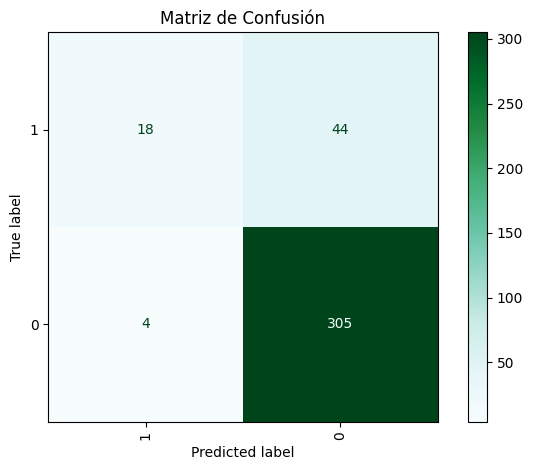

In [7]:
classes =[1, 0] 

display=ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, labels=classes, cmap=plt.cm.BuGn, xticks_rotation='vertical')
print(classification_report(y_test, y_pred, labels=classes))

plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

Como podemos ver, con los hiperparámetros por defecto de SGDClassifier, el modelo no aprende nada, prediciendo siempre lo mismo.

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [8]:
def evaluate_model(model, X, y):
    model.fit(X, y)
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    recall = recall_score(y, y_pred)
    precision = precision_score(y, y_pred)
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Recall:", recall)
    print("Precision:", precision)
    print(classification_report(y, y_pred, labels=classes))

In [9]:
model = SGDClassifier(random_state=42)
space = {
    'loss': ['hinge','log_loss', 'perceptron', 'squared_error'],
    'alpha': np.logspace(-5, 3, num=17,  base=10 ,endpoint=True, dtype=None),
    'learning_rate': ['constant','adaptive', 'optimal'],
    'eta0': np.logspace(-5, 3, num=17,  base=10 ,endpoint=True, dtype=None),
}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model, space, cv=5, verbose=1, n_jobs=-1,scoring='f1')
grid.fit(X_train, y_train) 


Fitting 5 folds for each of 3468 candidates, totalling 17340 fits


GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-05, 3.16227766e-05, 1.00000000e-04, 3.16227766e-04,
       1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03]),
                         'eta0': array([1.00000000e-05, 3.16227766e-05, 1.00000000e-04, 3.16227766e-04,
       1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03]),
                         'learning_rate': ['constant', 'adaptive', 'optimal'],
                         'loss': ['hinge', 'log_loss', 'perceptron',
                                  'squared_error']},
             scoring='f1', verbose=1)

In [10]:
results = grid.cv_results_
for mean_score, std_dev, params in zip(results["mean_test_score"], results["std_test_score"], results["params"]):
    print(f"for {params}\n{mean_score:.3f} (+/-{std_dev*2:.03f})\n")

 

for {'alpha': 1e-05, 'eta0': 1e-05, 'learning_rate': 'constant', 'loss': 'hinge'}
0.343 (+/-0.053)

for {'alpha': 1e-05, 'eta0': 1e-05, 'learning_rate': 'constant', 'loss': 'log_loss'}
0.413 (+/-0.094)

for {'alpha': 1e-05, 'eta0': 1e-05, 'learning_rate': 'constant', 'loss': 'perceptron'}
0.495 (+/-0.095)

for {'alpha': 1e-05, 'eta0': 1e-05, 'learning_rate': 'constant', 'loss': 'squared_error'}
0.375 (+/-0.063)

for {'alpha': 1e-05, 'eta0': 1e-05, 'learning_rate': 'adaptive', 'loss': 'hinge'}
0.343 (+/-0.053)

for {'alpha': 1e-05, 'eta0': 1e-05, 'learning_rate': 'adaptive', 'loss': 'log_loss'}
0.413 (+/-0.094)

for {'alpha': 1e-05, 'eta0': 1e-05, 'learning_rate': 'adaptive', 'loss': 'perceptron'}
0.437 (+/-0.115)

for {'alpha': 1e-05, 'eta0': 1e-05, 'learning_rate': 'adaptive', 'loss': 'squared_error'}
0.375 (+/-0.063)

for {'alpha': 1e-05, 'eta0': 1e-05, 'learning_rate': 'optimal', 'loss': 'hinge'}
0.407 (+/-0.224)

for {'alpha': 1e-05, 'eta0': 1e-05, 'learning_rate': 'optimal', 'loss

In [11]:
print(grid.best_params_)
# for {'alpha': 0.001, 'eta0': 0.001, 'learning_rate': 'constant', 'loss': 'log_loss'} 
# 0.832 (+/-0.013)

{'alpha': 100.0, 'eta0': 0.01, 'learning_rate': 'adaptive', 'loss': 'perceptron'}


In [12]:
best=grid.best_params_

In [13]:
model = SGDClassifier(random_state=42,**best)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

classes = model.classes_
print(classes)

[0 1]


In [14]:
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             ConfusionMatrixDisplay,
                             accuracy_score,
                             f1_score,
                             recall_score,
                             precision_score
                             )

In [15]:
# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Parametros por defecto

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

print("Accuracy:", accuracy)

Accuracy: 0.7466307277628033
F1 Score: 0.29850746268656714
Recall: 0.3225806451612903
Precision: 0.2777777777777778
Accuracy: 0.7466307277628033


              precision    recall  f1-score   support

           1       0.28      0.32      0.30        62
           0       0.86      0.83      0.85       309

    accuracy                           0.75       371
   macro avg       0.57      0.58      0.57       371
weighted avg       0.76      0.75      0.75       371



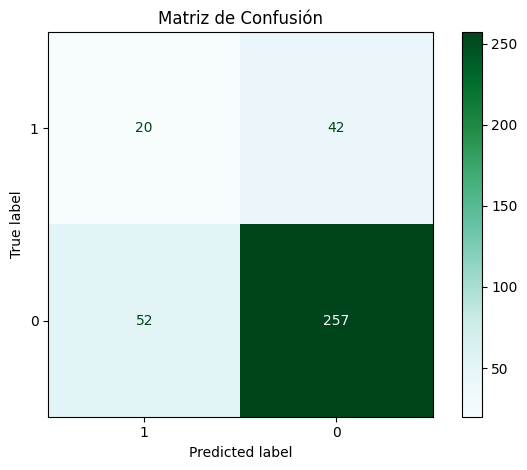

In [16]:
classes =[1, 0] 

display=ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, labels=classes, cmap=plt.cm.BuGn)
print(classification_report(y_test, y_pred, labels=classes))

plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [17]:
from sklearn import tree


model_tree= tree.DecisionTreeClassifier(random_state=42)
model_tree.fit(X_train,y_train)
y_pred=model_tree.predict(X_test)


In [18]:
# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.8840970350404312
F1 Score: 0.6194690265486725
Recall: 0.5645161290322581
Precision: 0.6862745098039216


              precision    recall  f1-score   support

           1       0.69      0.56      0.62        62
           0       0.92      0.95      0.93       309

    accuracy                           0.88       371
   macro avg       0.80      0.76      0.78       371
weighted avg       0.88      0.88      0.88       371



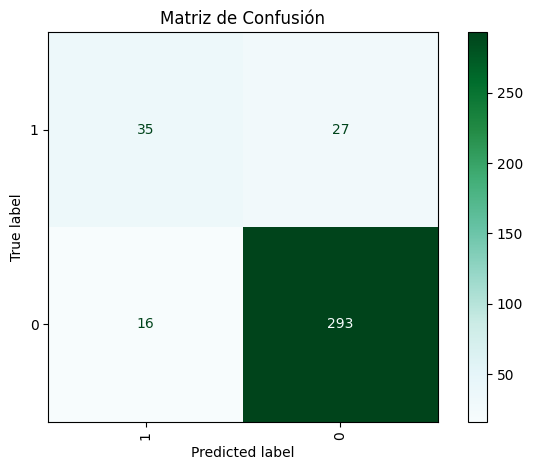

In [19]:
classes =[1, 0] 

display=ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, labels=classes, cmap=plt.cm.BuGn, xticks_rotation='vertical')
print(classification_report(y_test, y_pred, labels=classes))

plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Metrica utilizada F1

In [20]:
model = tree.DecisionTreeClassifier(random_state=42)
space = {
    'criterion': ['gini','entropy'],
    'max_depth': np.arange(2,20,1),
    'min_samples_split':np.arange(2,22,1),
    'min_samples_leaf':np.arange(2,22,1)
}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model, space, cv=5, verbose=1, n_jobs=-1,scoring='f1')
grid.fit(X_train, y_train) 


Fitting 5 folds for each of 14400 candidates, totalling 72000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])},
             scoring='f1', verbose=1)

In [21]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 19,
 'min_samples_leaf': 2,
 'min_samples_split': 6}

In [22]:
results = grid.cv_results_
for mean_score, std_dev, params in zip(results["mean_test_score"], results["std_test_score"], results["params"]):
    print(f"for {params}\n{mean_score:.3f} (+/-{std_dev*2:.03f})\n")


for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.495 (+/-0.122)

for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.495 (+/-0.122)

for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 4}
0.495 (+/-0.122)

for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.495 (+/-0.122)

for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 6}
0.495 (+/-0.122)

for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 7}
0.495 (+/-0.122)

for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 8}
0.495 (+/-0.122)

for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 9}
0.495 (+/-0.122)

for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.495 (+/-0.122)

for {'criterion': 'gini', 'max_depth

In [23]:
treeCV=tree.DecisionTreeClassifier(random_state=42,**grid.best_params_)
treeCV.fit(X_train,y_train)
y_pred=treeCV.predict(X_test)

In [24]:
# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.8706199460916442
F1 Score: 0.5294117647058822
Recall: 0.43548387096774194
Precision: 0.675


              precision    recall  f1-score   support

           1       0.68      0.44      0.53        62
           0       0.89      0.96      0.93       309

    accuracy                           0.87       371
   macro avg       0.78      0.70      0.73       371
weighted avg       0.86      0.87      0.86       371



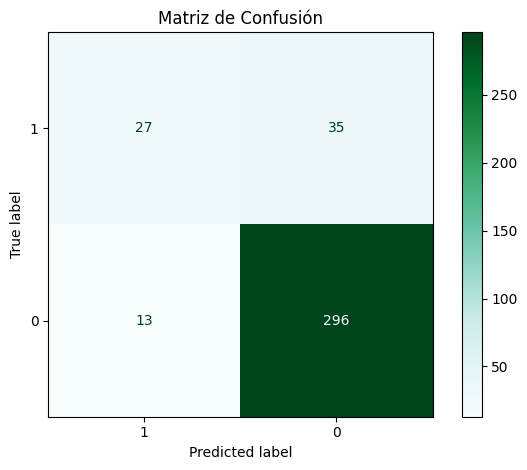

In [25]:
classes = [1,0]

display=ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, labels=classes, cmap=plt.cm.BuGn)
print(classification_report(y_test, y_pred, labels=classes))

plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

Metrica utilizada Balanced Accuracy 

The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.



In [26]:
model = tree.DecisionTreeClassifier(random_state=42)
space = {
    'criterion': ['gini','entropy'],
    'max_depth': np.arange(2,30,1),
    'min_samples_split':np.arange(2,22,1),
    'min_samples_leaf':np.arange(2,22,1)
}

from sklearn.model_selection import GridSearchCV

grid1 = GridSearchCV(model, space, cv=5, verbose=1, n_jobs=-1,scoring='balanced_accuracy')
grid1.fit(X_train, y_train) 


Fitting 5 folds for each of 22400 candidates, totalling 112000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])},
             scoring='balanced_accuracy', verbose=1)

In [27]:
treeCV1=tree.DecisionTreeClassifier(random_state=42,**grid1.best_params_)
treeCV1.fit(X_train,y_train)
y_pred=treeCV1.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

Accuracy: 0.8706199460916442
F1 Score: 0.5294117647058822
Recall: 0.43548387096774194
Precision: 0.675


              precision    recall  f1-score   support

           1       0.68      0.44      0.53        62
           0       0.89      0.96      0.93       309

    accuracy                           0.87       371
   macro avg       0.78      0.70      0.73       371
weighted avg       0.86      0.87      0.86       371



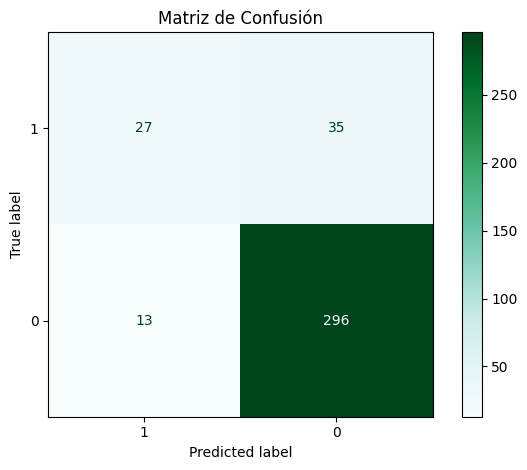

In [29]:
classes =[1, 0] 

display=ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, labels=classes, cmap=plt.cm.BuGn)
print(classification_report(y_test, y_pred, labels=classes))

plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

In [ ]:
Cosa extra que intente la idea es no entregar eso 

In [48]:
path= tree1.cost_complexity_pruning_path(X,y)
ccp_alphas, impurities = path.ccp_alphas,path.impurities

clfs =[]
for ccp_alpha in ccp_alphas:
  clf=tree.DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
  clf.fit(X,y)
  clfs.append(clf)

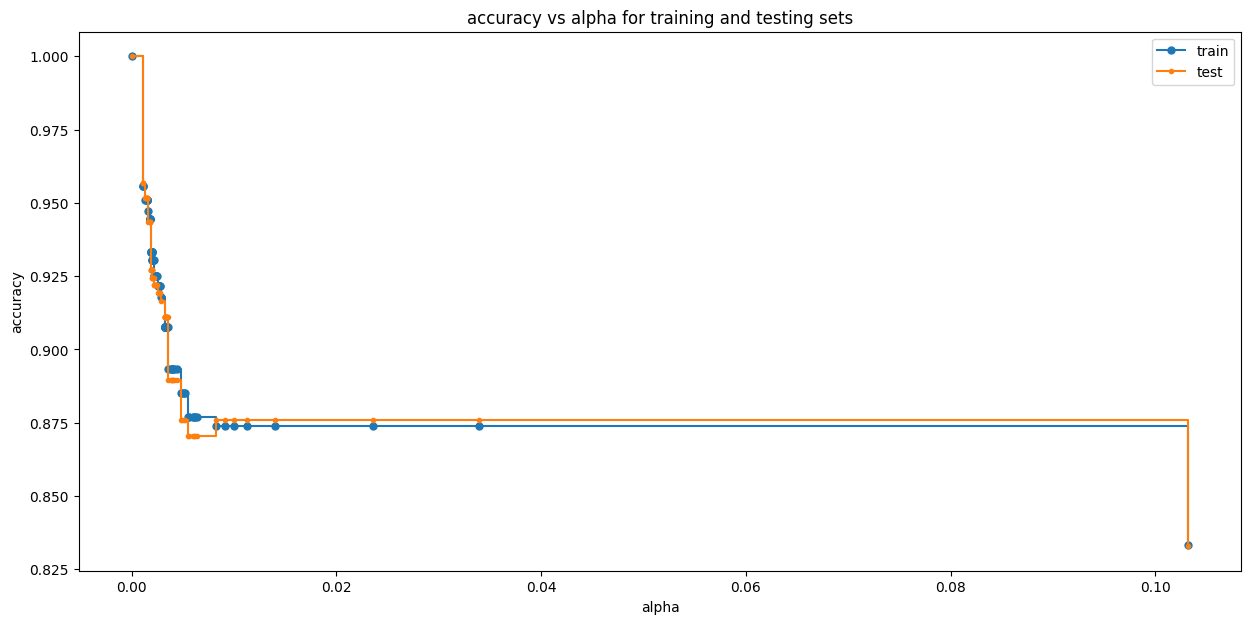

In [49]:
train_scores= [clf.score(X,y) for clf in clfs]
test_scores = [clf.score(X_test,y_test) for clf in clfs]

fig,ax = plt.subplots(figsize=(15, 7))

ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker ='o',label='train',drawstyle='steps-post',markersize=5,)
ax.plot(ccp_alphas, test_scores, marker ='o',label='test',drawstyle='steps-post',markersize=3,)
#plt.xlim(0,0.0020)
ax.legend()
plt.show()

In [43]:
clf=tree.DecisionTreeClassifier(random_state=27,ccp_alpha=0.00175)
clf.fit(X,y)
print('accuracy con test',clf.score(X_test,y_test), 'la cual quiero que sea igual o cercan a ',max(test_scores) )
print('accuracy con train',clf.score(X,y))
y_pred=clf.predict(X_test)

accuracy con test 0.9433962264150944 la cual quiero que sea igual o cercan a  1.0
accuracy con train 0.9444444444444444


Accuracy: 0.9433962264150944
F1 Score: 0.8108108108108109
Recall: 0.7258064516129032
Precision: 0.9183673469387755
              precision    recall  f1-score   support

           1       0.92      0.73      0.81        62
           0       0.95      0.99      0.97       309

    accuracy                           0.94       371
   macro avg       0.93      0.86      0.89       371
weighted avg       0.94      0.94      0.94       371



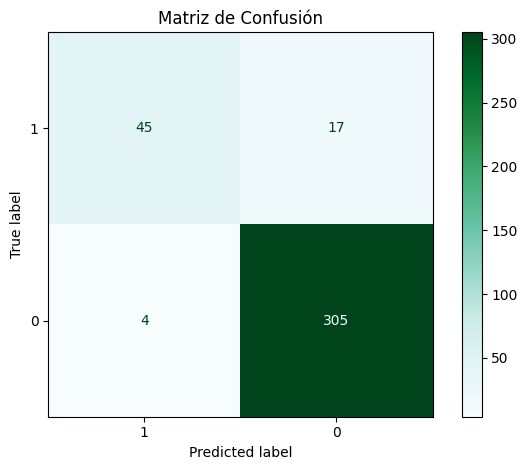

In [44]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)

classes =[1, 0] 

display=ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, labels=classes, cmap=plt.cm.BuGn)
print(classification_report(y_test, y_pred, labels=classes))

plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

In [ ]:

'''
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.cluster import KMeans

clusterer= KMeans(n_clusters=2, n_init="auto", random_state=42,)
labels = clusterer.fit_predict(X)
#algorithm{“lloyd”, “elkan”, “auto”, “full”}


from sklearn.metrics import adjusted_rand_score,adjusted_mutual_info_score,homogeneity_score, completeness_score, v_measure_score,silhouette_score


ari = adjusted_rand_score(y, labels)
ami = adjusted_mutual_info_score(y, labels)
homogeneity = homogeneity_score(y, labels)
completeness = completeness_score(y, labels)
v_measure = v_measure_score(y, labels)
sil= silhouette_score(X,labels)


print("Adjusted Rand Index:", ari)
print("Adjusted Mutual information:", ami)
print("Homogeneity:", homogeneity)
print("Completeness:", completeness)
print("V Measure:", v_measure)
print("Silhouette:",sil)
'''